In [98]:
#retrieve data
import fredapi as fa
import numpy as np
import pandas as pd
fred = fa.Fred(api_key='5a1ff3ede53791bbf50cfe6c9d218b7f')

In [99]:
treasury_1y = fred.get_series('GS1')
treasury_1y.name = '1Y Treasury'
treasury_2y = fred.get_series('GS2')
treasury_2y.name = '2Y Treasury'
treasury_3y = fred.get_series('GS3')
treasury_3y.name = '3Y Treasury'
treasury_5y = fred.get_series('GS5')
treasury_5y.name = '5Y Treasury'
treasury_7y = fred.get_series('GS7')
treasury_7y.name = '7Y Treasury'
treasury_10y = fred.get_series('GS10')
treasury_10y.name = '10Y Treasury'

In [100]:
#monthly changes
t1=treasury_1y.pct_change()
t2=treasury_2y.pct_change()
t3=treasury_3y.pct_change()
t5=treasury_5y.pct_change()
t7=treasury_7y.pct_change()
t10=treasury_10y.pct_change()

In [101]:
t1=t1[279:835]

In [102]:
t2=t2.dropna()

In [103]:
t3=t3[279:835]

In [104]:
t5

1953-04-01         NaN
1953-05-01    0.095420
1953-06-01    0.024390
1953-07-01   -0.064626
1953-08-01    0.018182
                ...   
2022-06-01    0.111498
2022-07-01   -0.072100
2022-08-01    0.023649
2022-09-01    0.221122
2022-10-01    0.129730
Name: 5Y Treasury, Length: 835, dtype: float64

In [105]:
t7=t7[84:640]

In [106]:
t10=t10[279:835]

In [107]:
df_treasury=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(t1,t2,left_index=True,right_index=True),t3,left_index=True,right_index=True),t5,left_index=True,right_index=True),t7,left_index=True,right_index=True),t10,left_index=True,right_index=True)
df_treasury #new dataset of monthly changes

,1Y Treasury,2Y Treasury,3Y Treasury,5Y Treasury,7Y Treasury,10Y Treasury
1976-07-01,-0.049080,-0.029745,-0.025992,-0.015769,-0.006452,-0.003817
1976-08-01,-0.032258,-0.032117,-0.036517,-0.024032,-0.015584,-0.007663
1976-09-01,-0.026667,-0.031674,-0.029155,-0.024624,-0.022427,-0.023166
1976-10-01,-0.058219,-0.068536,-0.063063,-0.053296,-0.033738,-0.023715
1976-11-01,-0.038182,-0.028428,-0.024038,-0.034074,-0.041899,-0.016194
...,...,...,...,...,...,...
2022-06-01,0.286408,0.145038,0.129032,0.111498,0.099315,0.082759
2022-07-01,0.139623,0.013333,-0.038095,-0.072100,-0.074766,-0.076433
2022-08-01,0.086093,0.069079,0.066007,0.023649,0.003367,0.000000
2022-09-01,0.185976,0.187692,0.201238,0.221122,0.221477,0.213793


In [109]:
cov_mat = np.cov(df_treasury.T)

In [110]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [111]:
eigen_vals

array([4.81943789e-02, 7.10010567e-03, 1.50341674e-03, 2.80799758e-04,
       6.21250542e-05, 2.54882799e-05])

In [112]:
var_exp

[0.8555555834293986,
 0.10959262727653414,
 0.026848575977261275,
 0.00590015412000756,
 0.0013477145104475042,
 0.0007553446863508143]

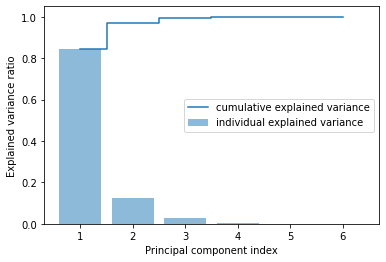

In [113]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,7), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [114]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [115]:
eigen_pairs

[(0.04819437885898102,
  array([0.50335356, 0.48732304, 0.46239632, 0.37519876, 0.30538581,
         0.24760148])),
 (0.007100105674053403,
  array([ 0.77095048,  0.06131471, -0.20180585, -0.36759125, -0.35483671,
         -0.31641405])),
 (0.001503416737889155,
  array([ 0.36681302, -0.57148925, -0.39846371,  0.130804  ,  0.35578862,
          0.48618894])),
 (0.00028079975848143806,
  array([ 0.13299553, -0.6152218 ,  0.49952971,  0.36142743, -0.05725597,
         -0.4694426 ])),
 (6.212505423066524e-05,
  array([-0.00498894,  0.23112563, -0.5693597 ,  0.55737402,  0.22939834,
         -0.50901492])),
 (2.5488279875201825e-05,
  array([-0.00246166, -0.01548805,  0.11397503, -0.51545834,  0.77352636,
         -0.35031903]))]

In [116]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.50335356  0.77095048  0.36681302]
 [ 0.48732304  0.06131471 -0.57148925]
 [ 0.46239632 -0.20180585 -0.39846371]
 [ 0.37519876 -0.36759125  0.130804  ]
 [ 0.30538581 -0.35483671  0.35578862]
 [ 0.24760148 -0.31641405  0.48618894]]


In [125]:
X_train_pca = df_treasury.dot(w)

In [122]:
X_train_pca[:,0].shape

(556,)

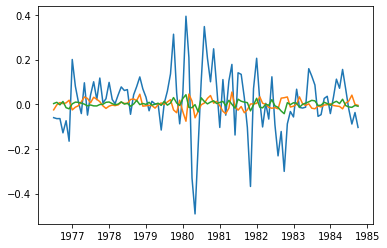

In [130]:
plt.plot(X_train_pca.head(100))